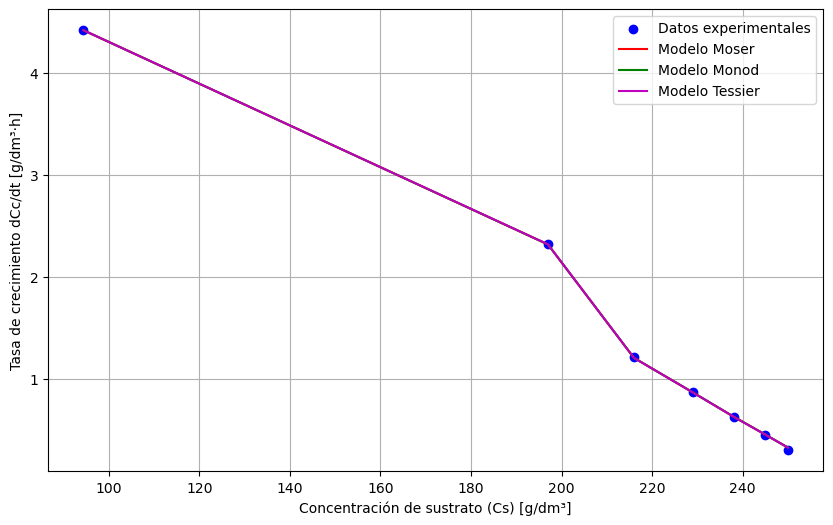


Parámetros estimados - Moser:
umax = 0.3271, ks = 15.9864, lambda = 1.5502

Parámetros estimados - Monod:
umax = 0.3284, ks = 1.6943

Parámetros estimados - Tessier:
umax = 0.3258, k = 20.4074


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Datos experimentales
T_exp = np.array([0, 1, 2, 3, 4, 6, 8])  # Tiempo en horas
C_C_exp = np.array([1, 1.39, 1.93, 2.66, 3.7, 7.12, 13.7])  # Biomasa (g/dm³)
C_S_exp = np.array([250, 245, 238, 229, 216, 197, 94.4])  # Sustrato (g/dm³)
dCdt_exp = np.array([0.30, 0.45, 0.63, 0.87, 1.21, 2.32, 4.42])  # dC_C/dt (g/dm³·h)

# Modelo de Moser
def moser_model(params, C_S, C_C):
    umax, ks, lam = params
    return (umax * C_C) / (1 + ks * C_S**-lam)

# Ajuste del modelo de Moser
params0 = [0.3, 16, 1]
res_moser = minimize(lambda p: np.sum((moser_model(p, C_S_exp, C_C_exp) - dCdt_exp)**2), params0)
umax_m, ks_m, lam_m = res_moser.x
rg_moser = moser_model(res_moser.x, C_S_exp, C_C_exp)

# Modelo de Monod
def monod_model(params, C_S, C_C):
    umax, ks = params
    return (umax * C_S * C_C) / (ks + C_S)

# Ajuste del modelo de Monod
params0 = [0.3, 16]
res_monod = minimize(lambda p: np.sum((monod_model(p, C_S_exp, C_C_exp) - dCdt_exp)**2), params0)
umax_monod, ks_monod = res_monod.x
rg_monod = monod_model(res_monod.x, C_S_exp, C_C_exp)

# Modelo de Tessier
def tessier_model(params, C_S, C_C):
    umax, k = params
    return umax * (1 - np.exp(-C_S / k)) * C_C

# Ajuste del modelo de Tessier
params0 = [0.3, 50]
res_tessier = minimize(lambda p: np.sum((tessier_model(p, C_S_exp, C_C_exp) - dCdt_exp)**2), params0)
umax_t, k_t = res_tessier.x
rg_tessier = tessier_model(res_tessier.x, C_S_exp, C_C_exp)

# Gráficos
plt.figure(figsize=(10, 6))
plt.scatter(C_S_exp, dCdt_exp, color='b', label='Datos experimentales')
plt.plot(C_S_exp, rg_moser, 'r-', label='Modelo Moser')
plt.plot(C_S_exp, rg_monod, 'g-', label='Modelo Monod')
plt.plot(C_S_exp, rg_tessier, 'm-', label='Modelo Tessier')
plt.xlabel('Concentración de sustrato (Cs) [g/dm³]')
plt.ylabel('Tasa de crecimiento dCc/dt [g/dm³·h]')
plt.legend()
plt.grid()
plt.show()

# Mostrar valores estimados
print("\nParámetros estimados - Moser:")
print(f"umax = {umax_m:.4f}, ks = {ks_m:.4f}, lambda = {lam_m:.4f}")

print("\nParámetros estimados - Monod:")
print(f"umax = {umax_monod:.4f}, ks = {ks_monod:.4f}")

print("\nParámetros estimados - Tessier:")
print(f"umax = {umax_t:.4f}, k = {k_t:.4f}")
